In [210]:
import pandas as pd
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score


In [211]:
df = pd.read_csv("data/all_seasons.csv", index_col=0)
country_codes = pd.read_csv("data/country_code.csv", index_col=0)

In [212]:
main_variables = df.groupby('player_name', as_index=False).agg({'player_height': 'mean', 'player_weight':'mean'})
main_variables1 = df.groupby('player_name', as_index=False).agg({'pts': 'mean', 'reb':'mean'})
main_variables2 = df.groupby('player_name', as_index=False).agg({'pts': 'mean', 'ast':'mean'})

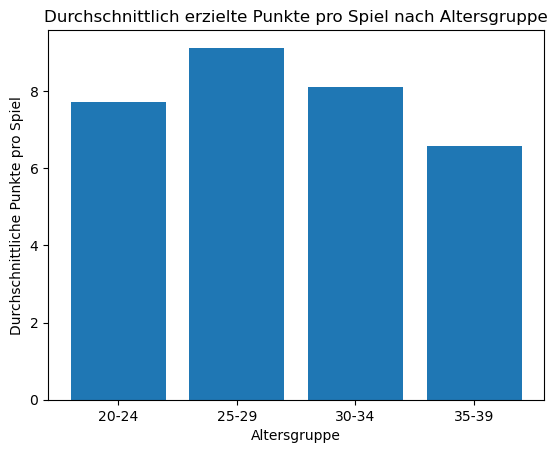

In [213]:
age_groups = [20, 25, 30, 35, 40]
df['age_group'] = pd.cut(df['age'], bins=age_groups, labels=['20-24', '25-29', '30-34', '35-39'])
average_points_by_age_group = df.groupby('age_group')['pts'].mean()
plt.bar(average_points_by_age_group.index, average_points_by_age_group.values)
plt.xlabel('Altersgruppe')
plt.ylabel('Durchschnittliche Punkte pro Spiel')
plt.title('Durchschnittlich erzielte Punkte pro Spiel nach Altersgruppe')
plt.show()

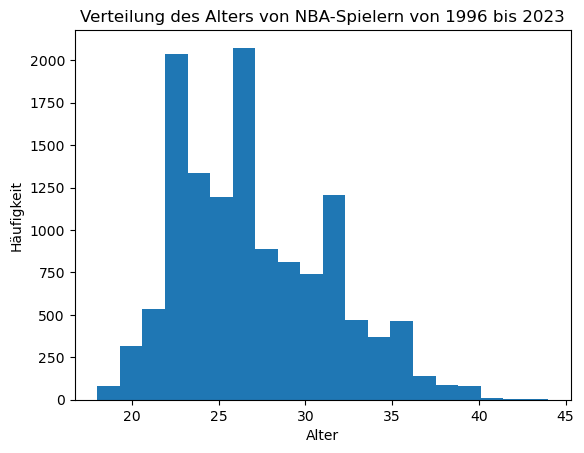

In [214]:
plt.hist(df['age'], bins=20)
plt.xlabel('Alter')
plt.ylabel('Häufigkeit')
plt.title('Verteilung des Alters von NBA-Spielern von 1996 bis 2023')
plt.show()

In [215]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,age_group
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,20-24
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,25-29
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,25-29
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,25-29
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,20-24


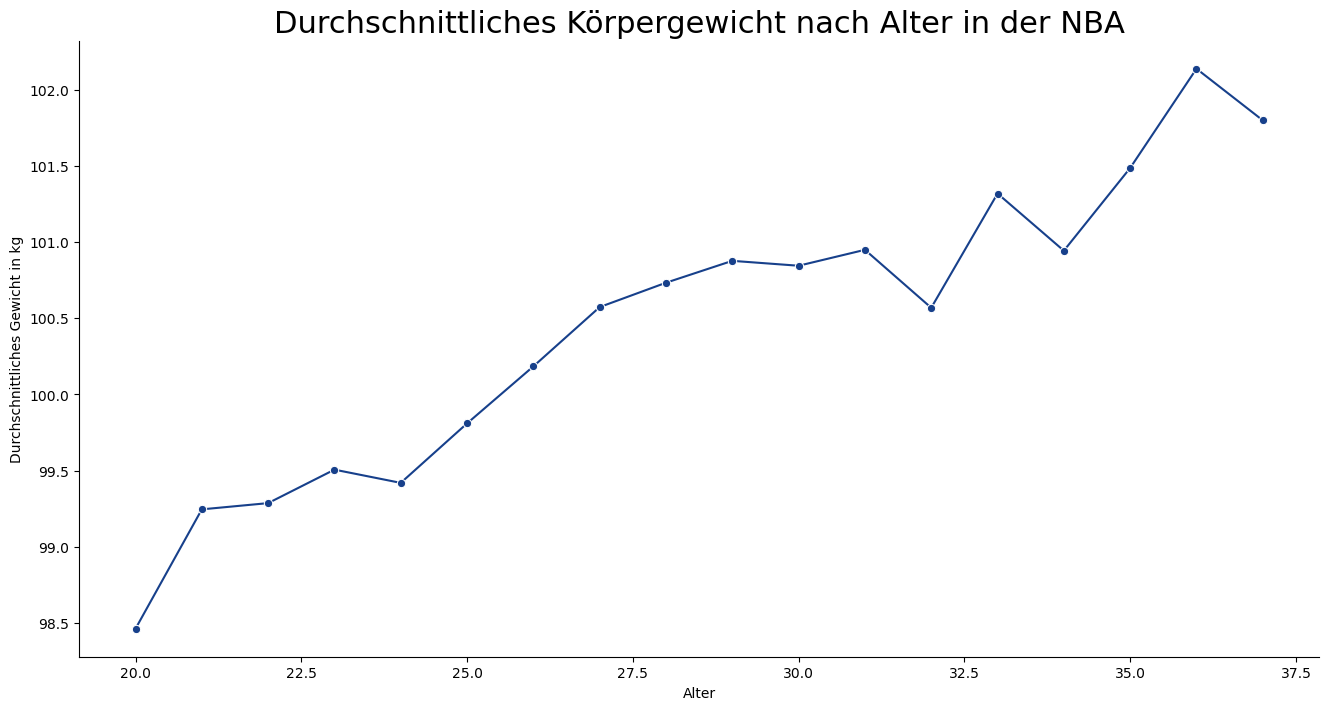

In [216]:
plt.figure(figsize=(16, 8))

w_by_age = df.groupby(['age'])['player_weight'].agg(['mean', 'count'])
w_by_age['outliers'] = np.where(w_by_age['count']<=100, 1, 0)
w_by_age = w_by_age.loc[w_by_age['outliers']==0]

sns.lineplot(x=w_by_age.index, y='mean', data=w_by_age, marker='o', color='#17408b')

plt.title('Durchschnittliches Körpergewicht nach Alter in der NBA', fontsize=22)
plt.ylabel('Durchschnittliches Gewicht in kg')
plt.xlabel('Alter')
sns.despine()

plt.show()

Text(0.5, 1.0, 'Korrelationsmatrix zu allen Spalten des Datensatzes')

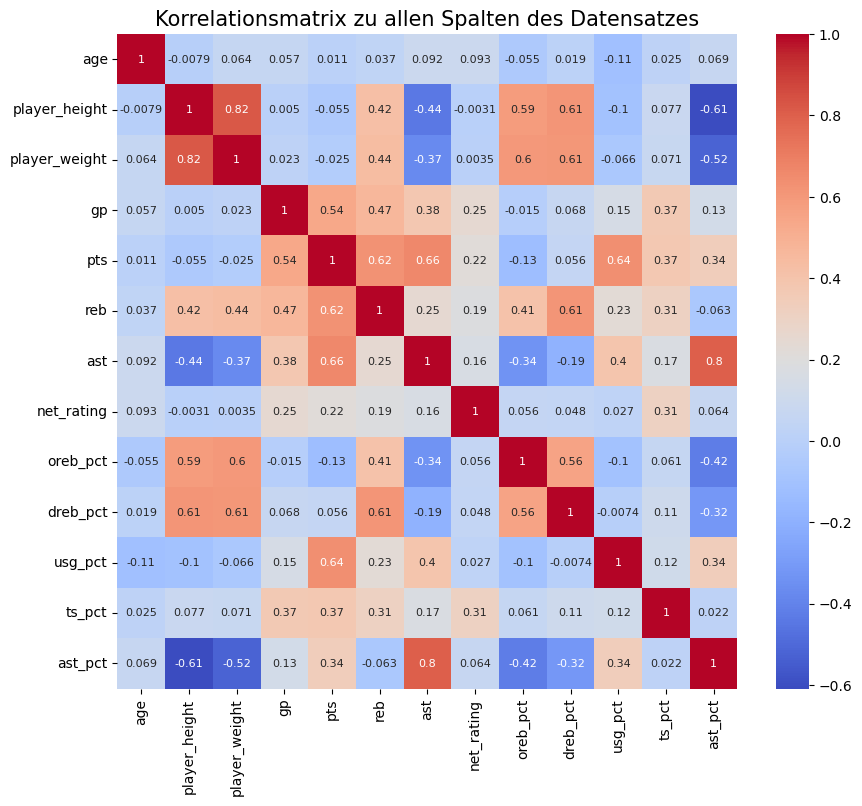

In [217]:
plt.figure(figsize = (10, 8.5))

sns.heatmap(
    df.select_dtypes(np.number).corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 8}
);
plt.title('Korrelationsmatrix zu allen Spalten des Datensatzes', fontsize=15)

In [218]:
print(df["player_weight"].mean())

100.26327920211773


C:\Users\s_goerer20\AppData\Local\Temp\ipykernel_8696\3287344379.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\s_goerer20\AppData\Local\Temp\ipykernel_8696\3287344379.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




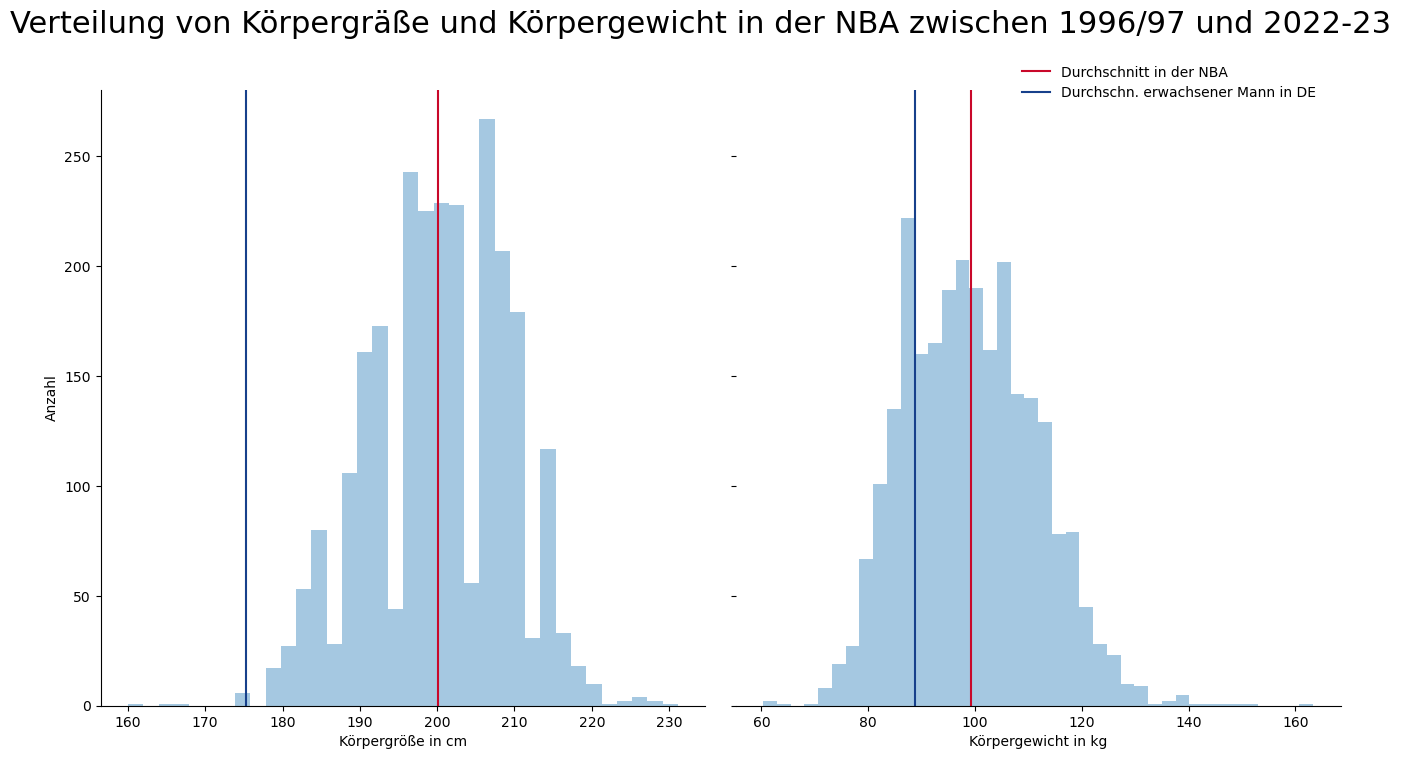

In [219]:
fig, ax = plt.subplots(1,2,figsize=(16, 8),sharey=True)
plt.subplots_adjust(wspace=0.05)

sns.distplot(main_variables ['player_height'], ax=ax[0], label='_nolegend_', kde=False)
sns.distplot(main_variables ['player_weight'], ax=ax[1], label='_nolegend_', kde=False)
ax[0].axvline(main_variables ['player_height'].mean(), color='#c9082a', label='Durchschnitt in der NBA')
ax[1].axvline(main_variables ['player_weight'].mean(), color='#c9082a', label='Durchschnitt in der NBA')

# Add lines for average adults to compare
ax[0].axvline(175.3, color='#17408b', label='Durchschn. erwachsener Mann in DE')
ax[1].axvline(88.8, color='#17408b', label='Durchschn. erwachsener Mann in DE')

ax[0].yaxis.set_label_text('Anzahl')
ax[0].xaxis.set_label_text('Körpergröße in cm')
ax[1].xaxis.set_label_text('Körpergewicht in kg')
plt.suptitle('Verteilung von Körpergräße und Körpergewicht in der NBA zwischen 1996/97 und 2022-23', fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.06), frameon=False)
sns.despine(ax=ax[1], left=True)
sns.despine(ax=ax[0])

plt.show()

In [220]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,age_group
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,20-24
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,25-29
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,25-29
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,25-29
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,20-24


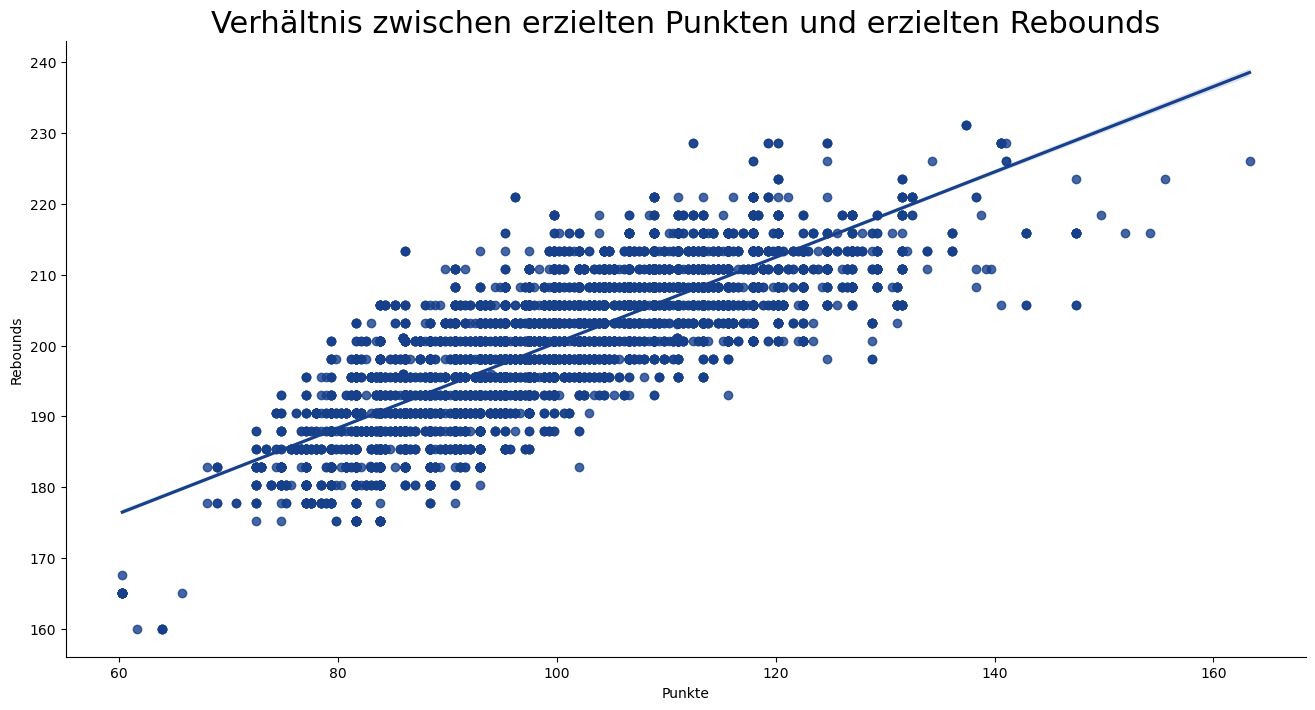

In [221]:
plt.figure(figsize=(16, 8))

sns.regplot(x='player_weight', y='player_height', data=df, color='#17408b')

plt.title('Verhältnis zwischen erzielten Punkten und erzielten Rebounds', fontsize=22)
plt.ylabel('Rebounds')
plt.xlabel('Punkte')
sns.despine()

plt.show()

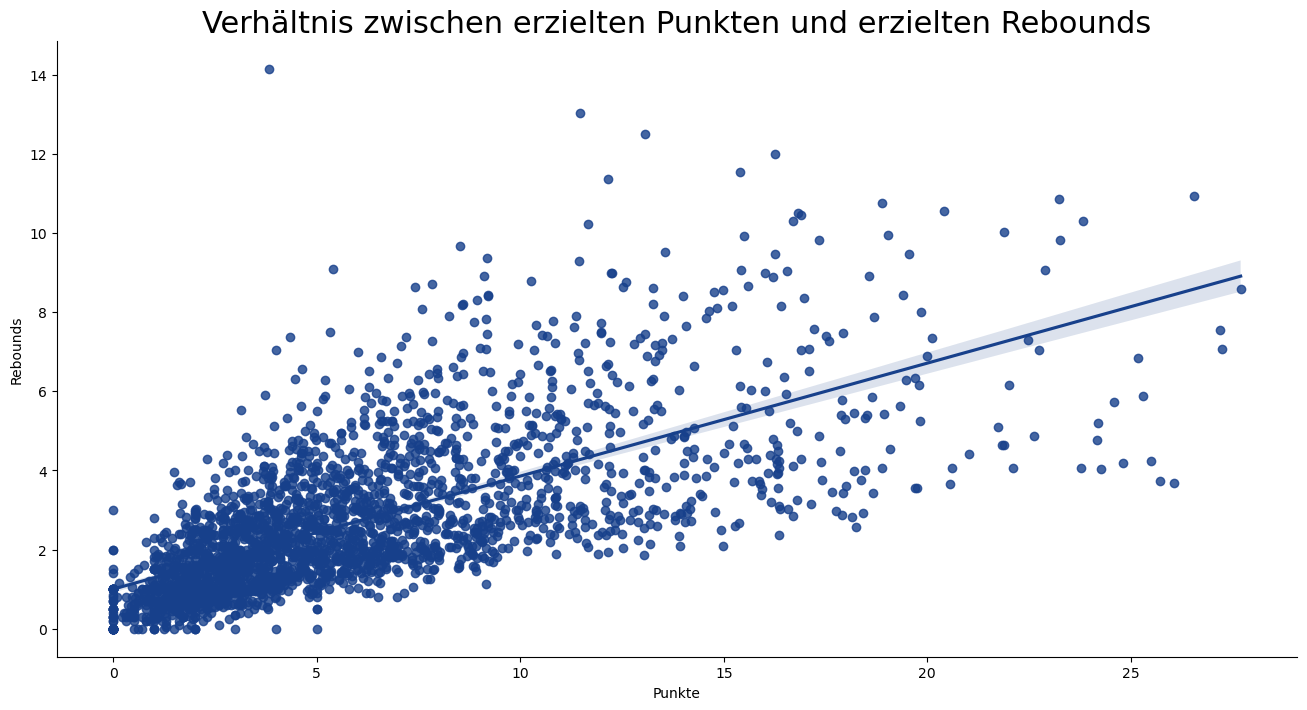

In [222]:
plt.figure(figsize=(16, 8))

sns.regplot(x='pts', y='reb', data=main_variables1, color='#17408b')

plt.title('Verhältnis zwischen erzielten Punkten und erzielten Rebounds', fontsize=22)
plt.ylabel('Rebounds')
plt.xlabel('Punkte')
sns.despine()

plt.show()

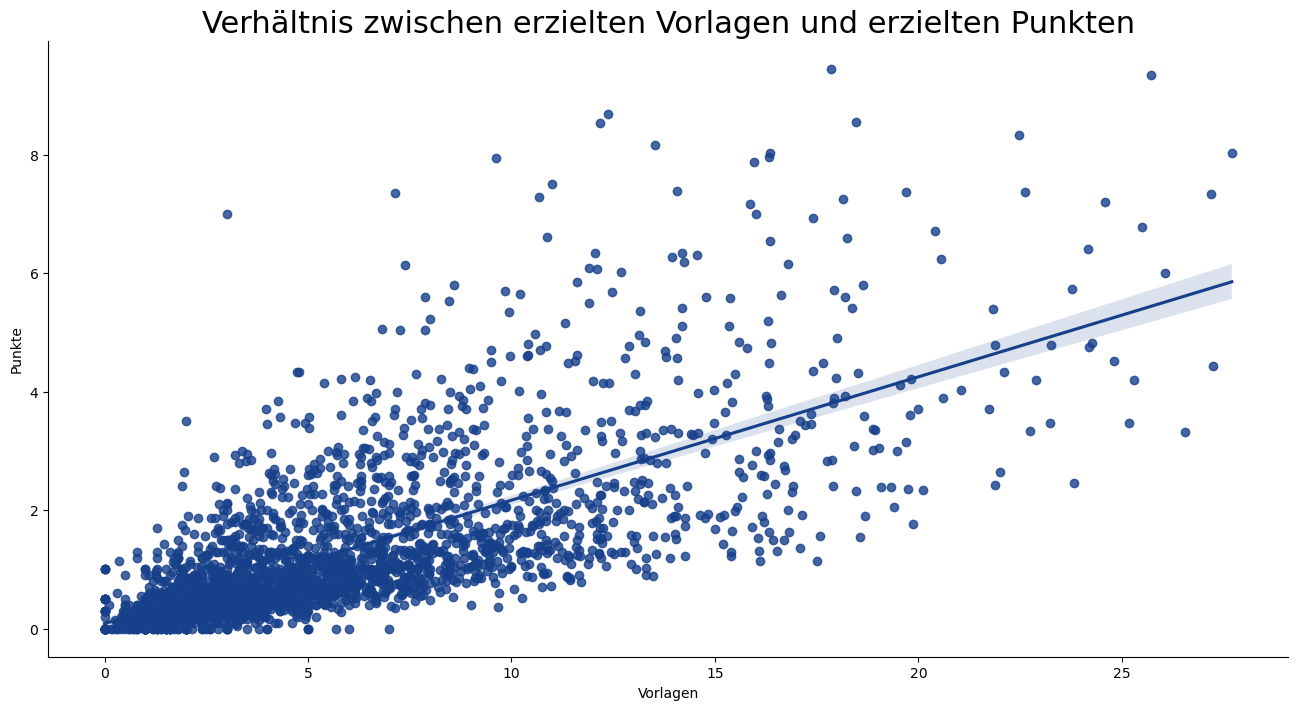

In [223]:
plt.figure(figsize=(16, 8))

sns.regplot(x='pts', y='ast', data=main_variables2, color='#17408b')

plt.title('Verhältnis zwischen erzielten Vorlagen und erzielten Punkten', fontsize=22)
plt.ylabel('Punkte')
plt.xlabel('Vorlagen')
sns.despine()

plt.show()

In [224]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,age_group
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97,20-24
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97,25-29
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97,25-29
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97,25-29
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97,20-24


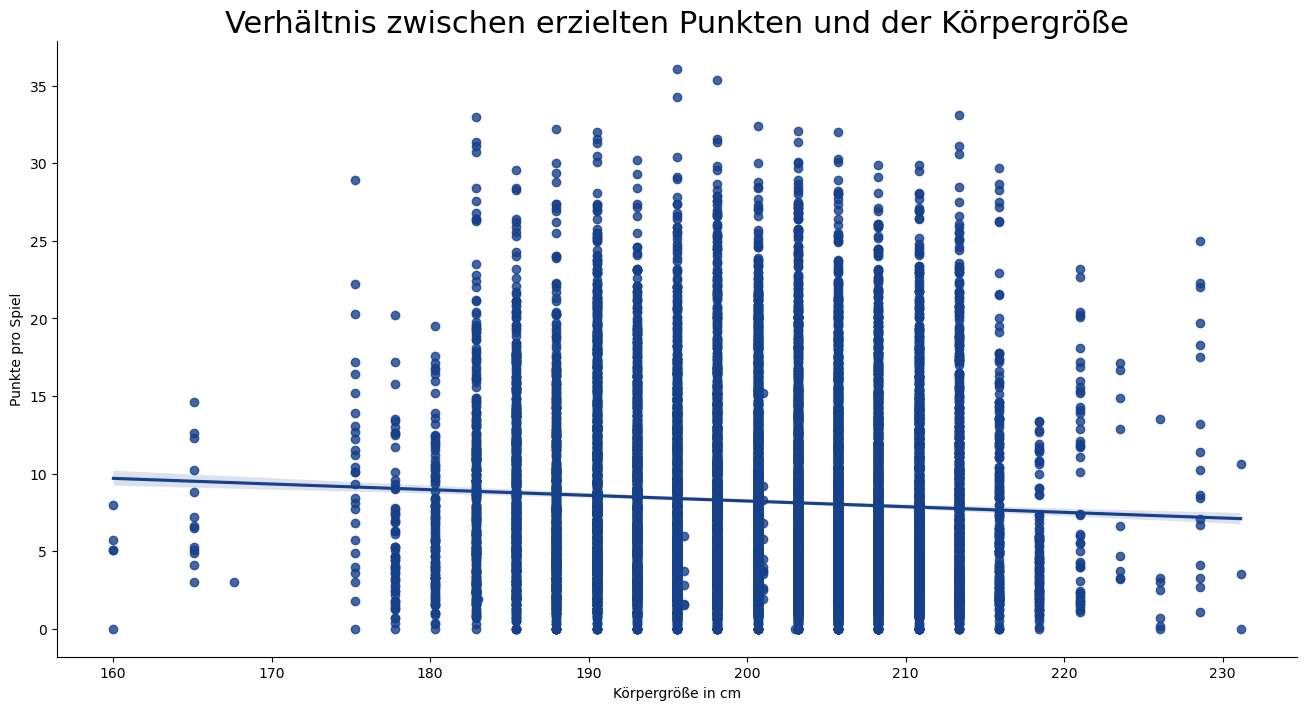

In [225]:
plt.figure(figsize=(16, 8))

sns.regplot(x='player_height', y='pts', data=df, color='#17408b')

plt.title('Verhältnis zwischen erzielten Punkten und der Körpergröße', fontsize=22)
plt.ylabel('Punkte pro Spiel')
plt.xlabel('Körpergröße in cm')
sns.despine()

plt.show()

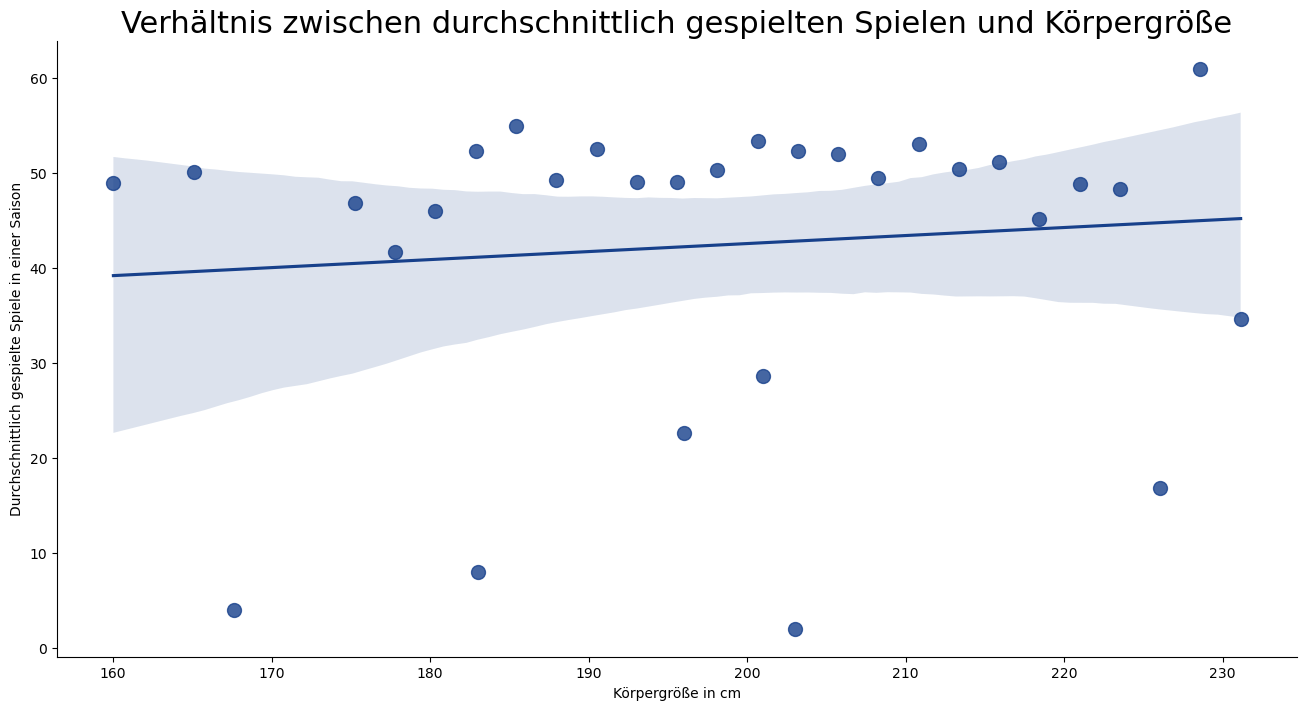

In [226]:
grouped_data = df.groupby('player_height')['gp'].mean().reset_index()

# Plot the aggregated data
plt.figure(figsize=(16, 8))
sns.regplot(x='player_height', y='gp', data=grouped_data, color='#17408b', scatter_kws={'s': 100})

plt.title('Verhältnis zwischen durchschnittlich gespielten Spielen und Körpergröße', fontsize=22)
plt.ylabel('Durchschnittlich gespielte Spiele in einer Saison')
plt.xlabel('Körpergröße in cm')
sns.despine()

plt.show()

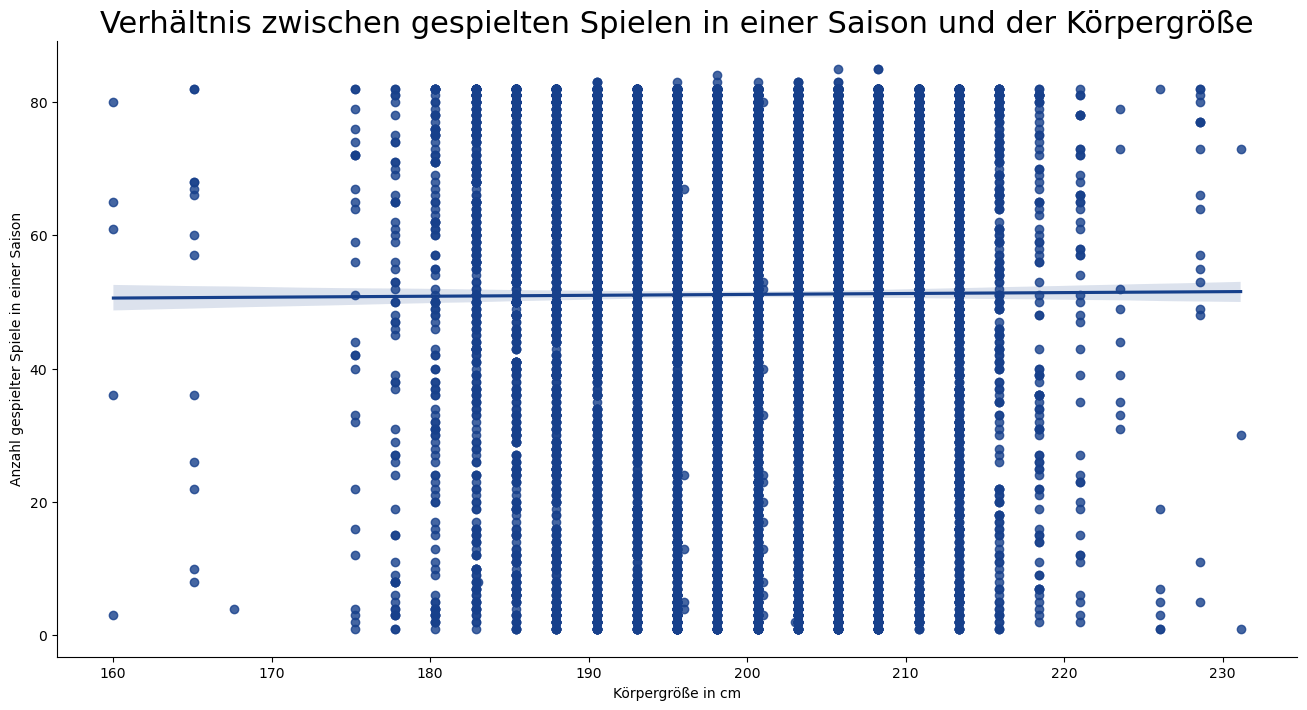

In [227]:
plt.figure(figsize=(16, 8))

sns.regplot(x='player_height', y='gp', data=df, color='#17408b')

plt.title('Verhältnis zwischen gespielten Spielen in einer Saison und der Körpergröße', fontsize=22)
plt.ylabel('Anzahl gespielter Spiele in einer Saison')
plt.xlabel('Körpergröße in cm')
sns.despine()

plt.show()

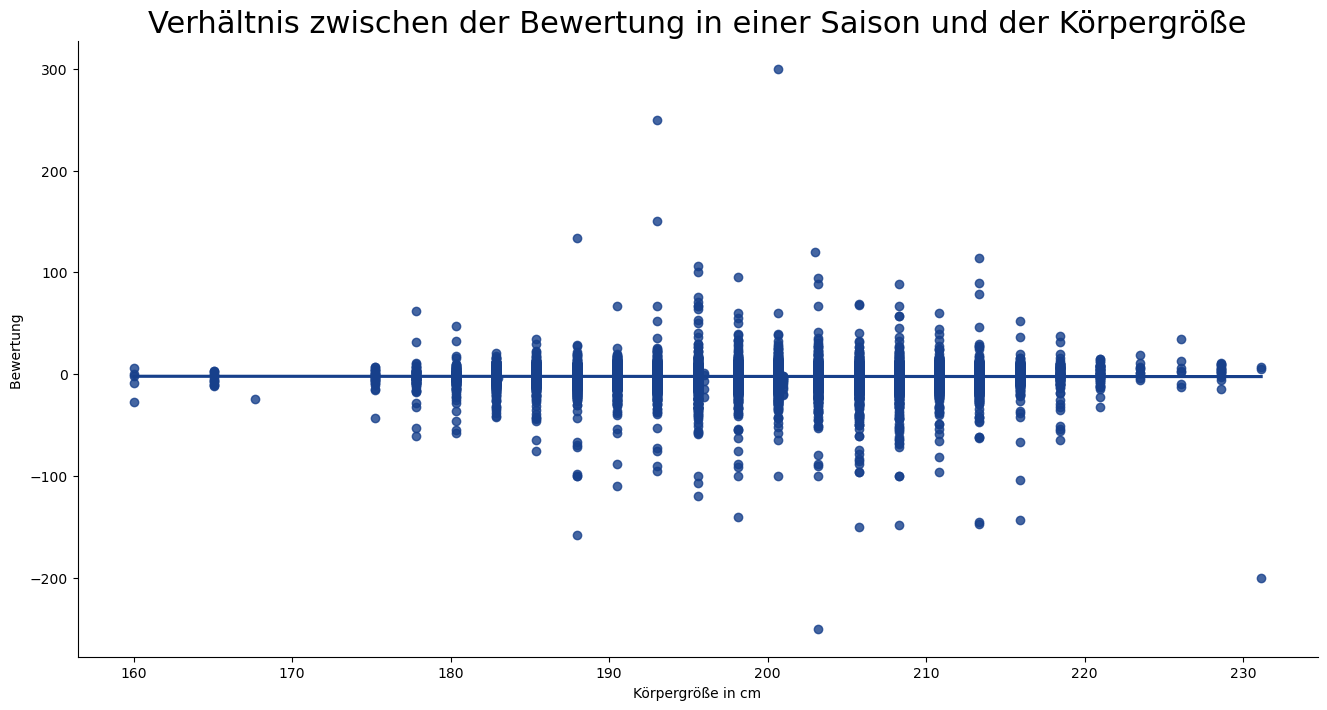

In [228]:
plt.figure(figsize=(16, 8))

sns.regplot(x='player_height', y='net_rating', data=df, color='#17408b')

plt.title('Verhältnis zwischen der Bewertung in einer Saison und der Körpergröße', fontsize=22)
plt.ylabel('Bewertung ')
plt.xlabel('Körpergröße in cm')
sns.despine()

plt.show()

In [229]:
def undraft_number(draft_number):
    undraft_number_dict = {
        'Undrafted': '61',
        '0': '61',
    }
    try:
        return undraft_number_dict[draft_number]
    except:
        return draft_number
df.draft_number = df.draft_number.apply(undraft_number) #cleaning the draft_number setting number to 61 if player was undrafted
df['draft_number'] = df.draft_number.astype('int64')

In [230]:
df.rename(columns = {'player_height':'height', 'player_weight':'weight', 
                     'pts':'avg_pts', 'reb':'avg_reb', 'ast':'avg_ast','gp':'games_played'}, inplace = True) #renaming columns because they are averages of player's pts,reb,assists
df['height_in_feets'] = (df['height'] / 30.28).round(1)
df['season_start'] = df['season'].str[:4]
df['season_end'] =  df['season'].str[:2] + df['season'].str[5:] #adding columns for easier subseting

In [231]:
draft_and_height = df[['height','draft_number']] \
    .groupby('draft_number') \
    .mean()\
    .sort_values('draft_number',ascending=True)\
    .head(20)\
    .round(2)
    
draft_and_height.index.name = 'Position in Draft'

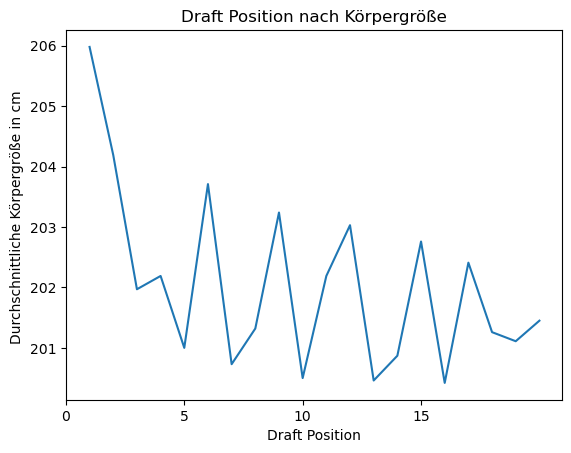

In [232]:
plt.plot(draft_and_height['height'])
plt.xlabel("Draft Position")
plt.ylabel("Durchschnittliche Körpergröße in cm ")
plt.title('Draft Position nach Körpergröße')
plt.xticks(ticks=range(0, len(draft_and_height), 5))
plt.show()

In [233]:
players = df.copy()
players.draft_number = players.draft_number.apply(undraft_number)
players['draft_number'] = players.draft_number.astype('int64')
players.head()

,player_name,team_abbreviation,age,height,weight,college,country,draft_year,draft_round,draft_number,...,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,age_group,height_in_feets,season_start,season_end
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,0.042,0.071,0.169,0.487,0.248,1996-97,20-24,6.4,1996,1997
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,0.030,0.111,0.174,0.497,0.043,1996-97,25-29,6.3,1996,1997
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,0.106,0.185,0.175,0.512,0.125,1996-97,25-29,6.7,1996,1997
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,0.027,0.111,0.206,0.527,0.125,1996-97,25-29,6.7,1996,1997
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,0.102,0.169,0.195,0.500,0.064,1996-97,20-24,7.0,1996,1997


In [234]:
columns_to_drop = [
    'age', 'college', 'country', 'draft_round', 'draft_year', 
    'oreb_pct', 'dreb_pct', 'ts_pct', 'ast_pct'
]

players.drop(columns_to_drop, axis='columns', inplace=True)

players.head()

,player_name,team_abbreviation,height,weight,draft_number,games_played,avg_pts,avg_reb,avg_ast,net_rating,usg_pct,season,age_group,height_in_feets,season_start,season_end
0,Randy Livingston,HOU,193.04,94.800728,42,64,3.9,1.5,2.4,0.3,0.169,1996-97,20-24,6.4,1996,1997
1,Gaylon Nickerson,WAS,190.50,86.182480,34,4,3.8,1.3,0.3,8.9,0.174,1996-97,25-29,6.3,1996,1997
2,George Lynch,VAN,203.20,103.418976,12,41,8.3,6.4,1.9,-8.2,0.175,1996-97,25-29,6.7,1996,1997
3,George McCloud,LAL,203.20,102.058200,7,64,10.2,2.8,1.7,-2.7,0.206,1996-97,25-29,6.7,1996,1997
4,George Zidek,DEN,213.36,119.748288,22,52,2.8,1.7,0.3,-14.1,0.195,1996-97,20-24,7.0,1996,1997


In [235]:
qualified_player = players[players['games_played'] > 60]
top_scorer = qualified_player[['player_name', 'net_rating', 'season', 'height', "avg_pts"]] \
    .sort_values('net_rating', ascending=False) \
    .head(20)

In [236]:
top_scorer.head()

,player_name,net_rating,season,height,avg_pts
8636,Draymond Green,18.9,2015-16,200.66,14.0
9467,JaVale McGee,18.7,2016-17,213.36,6.1
8930,Stephen Curry,18.3,2015-16,190.50,30.1
9257,Stephen Curry,17.2,2016-17,190.50,25.3
5207,Kevin Garnett,17.0,2007-08,210.82,18.8


In [237]:
qualified_player1 = players[players['games_played'] > 60]
top_scorer1 = qualified_player1[['player_name', 'avg_pts', 'season', 'height']] \
    .sort_values('avg_pts', ascending=False) \
    .head(20)

In [238]:
top_scorer.head()

,player_name,net_rating,season,height,avg_pts
8636,Draymond Green,18.9,2015-16,200.66,14.0
9467,JaVale McGee,18.7,2016-17,213.36,6.1
8930,Stephen Curry,18.3,2015-16,190.50,30.1
9257,Stephen Curry,17.2,2016-17,190.50,25.3
5207,Kevin Garnett,17.0,2007-08,210.82,18.8


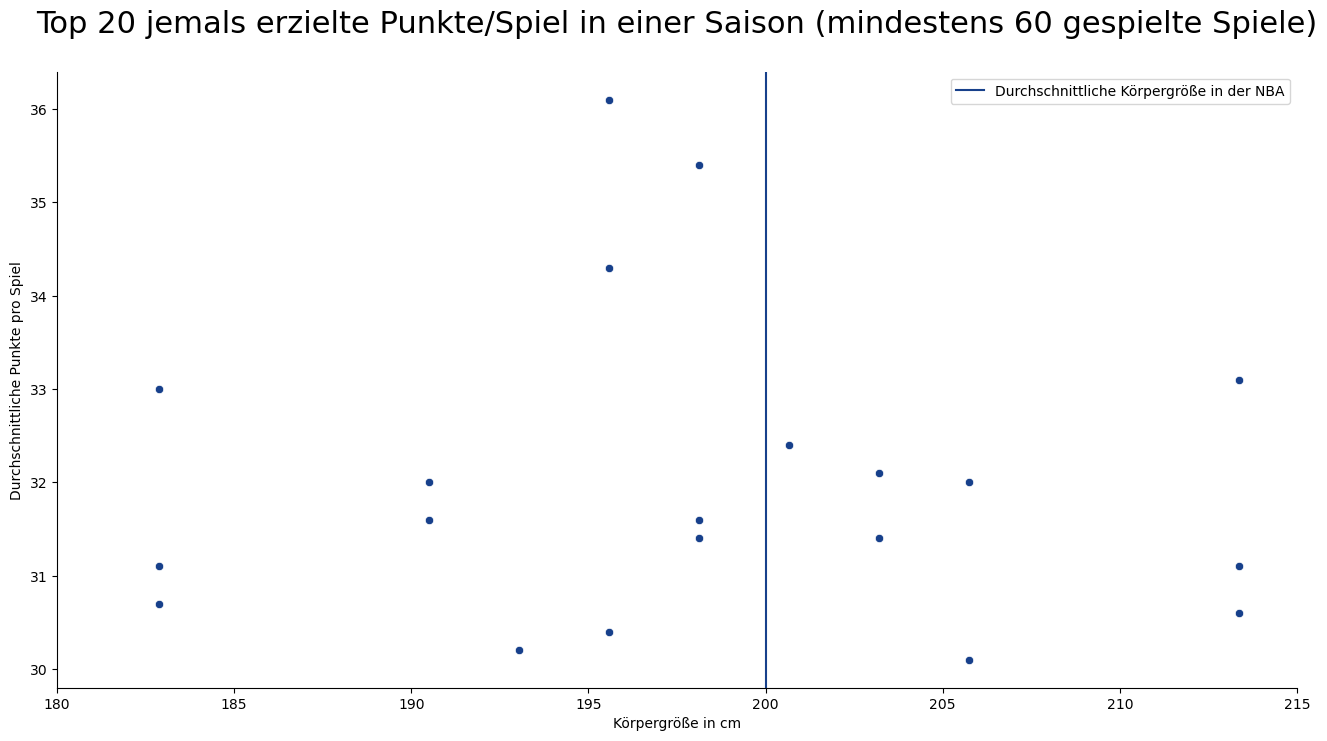

In [239]:
plt.figure(figsize=(16, 8))

sns.scatterplot(x='height', y='avg_pts', data=top_scorer1, color='#17408b')

plt.title('Top 20 jemals erzielte Punkte/Spiel in einer Saison (mindestens 60 gespielte Spiele)', fontsize=22, y= 1.05)
plt.ylabel('Durchschnittliche Punkte pro Spiel')
plt.xlabel('Körpergröße in cm')
sns.despine()
plt.axvline(200, color='#17408b', label='Durchschnittliche Körpergröße in der NBA')
plt.legend()
plt.xlim(180, 215)
plt.show()


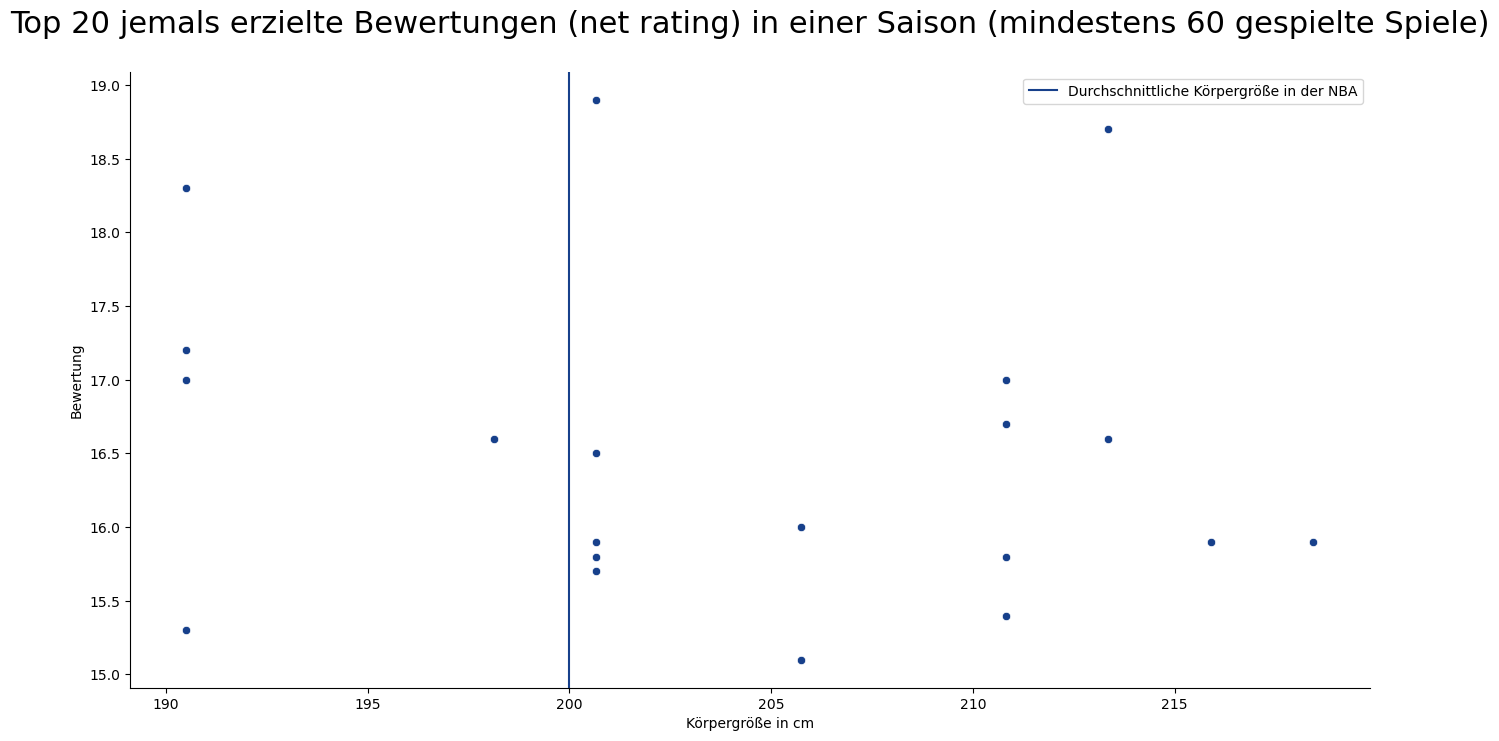

In [240]:
plt.figure(figsize=(16, 8))

sns.scatterplot(x='height', y='net_rating', data=top_scorer, color='#17408b')

plt.title('Top 20 jemals erzielte Bewertungen (net rating) in einer Saison (mindestens 60 gespielte Spiele)', fontsize=22, y= 1.05)
plt.ylabel('Bewertung')
plt.xlabel('Körpergröße in cm')
sns.despine()
plt.axvline(200, color='#17408b', label='Durchschnittliche Körpergröße in der NBA')
plt.legend()

plt.show()

In [241]:
df['drafted'] = np.where(df['draft_year'] != 'Undrafted', 1, 0)
df['draft_year'] = df['draft_year'].replace(r'Undrafted', np.nan, regex=True)

#convert datatime
df['draft_year'] = pd.to_datetime(df['draft_year'])
df['season'] = pd.to_datetime(df['season'].str[:4])

In [242]:
import plotly
import plotly.graph_objects as go
import datetime as dt

#load country code
country_codes = pd.read_csv("data/country_code.csv", index_col=0)

country_codes = country_codes[['Country_name', 'code_3digit']]
country_codes = country_codes.rename({'Country_name': 'country'}, axis=1) 
country_codes['country'] = country_codes['country'].replace({'United States of America': 'USA', 'Russian Federation':'Russia',
                                                             'Venezuela (Bolivarian Republic)':'Venezuela', 'Korea (South)':'South Korea',
                                                             'Tanzania, United Republic of':'Tanzania','Macedonia, Republic of':'Macedonia',
                                                             'Congo, (Kinshasa)':'Democratic Republic of the Congo',
                                                             'Congo (Brazzaville)':'Congo','Iran, Islamic Republic of':'Iran',
                                                             'Virgin Islands, US':'US Virgin Islands',
                                                             })


#1996Seaason
df_1996 = df[df["season"]==dt.datetime(1996,1,1)]
country_count_96 = df_1996.groupby("country").count()["player_name"]

#2019Season
df_2019 = df[df["season"]==dt.datetime(2022,1,1)]
country_count_19 = df_2019.groupby("country").count()["player_name"]

df96 = pd.DataFrame({
    'country' : country_count_96.index,
    'count' : country_count_96.values,},
)

df19 = pd.DataFrame({
    'country' : country_count_19.index,
    'count' : country_count_19.values,},
)

#merge data
df96 = pd.merge(df96, country_codes, how='inner', on='country')
df19 = pd.merge(df19, country_codes, how='inner', on='country')

#delete USA
df96 = df96.query('not country == "USA"')
df19 = df19.query('not country == "USA"')

#Gegrphy Graph
old_map = go.Choropleth(
    locations = df96['code_3digit'],
    z = df96['count'],
    text = df96['country'],
    colorscale = 'Reds',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Anzahl NBA Spieler nach Land'
)

new_map = go.Choropleth(
    locations = df19['code_3digit'],
    z = df19['count'],
    text = df19['country'],
    colorscale = 'Reds',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Anzahl NBA Spieler nach Land'
)

data = [old_map, new_map]

updatemenus = list([
    dict(type="buttons",
         buttons=list([   
            dict(label = '1996/1997 Map',
                 method = 'update',
                 args = [{'visible': [True, False]},
                         {'title': 'NBA Diversität in 1996/1997 nach Heimatland (ohne USA)'}]),

            dict(label = '2022/2023 Map',
                 method = 'update',
                 args = [{'visible': [False, True]},
                         {'title': 'NBA Diversität in 2022/2023 nach Heimatland (ohne USA)'}])
        ]),
    )
])

layout = dict(updatemenus=updatemenus,
             title_text='Anzahl NBA-Spieler nach Land',
             geo=dict(
                showframe=False,
                showcoastlines=False,
                projection_type='equirectangular'),
             margin=dict(l=0, r=0, b=0)
             )

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig)

plt.savefig("data.", dpi=200)

<Figure size 640x480 with 0 Axes>